In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load in the data
df = pd.read_csv('diamonds.csv')

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [11]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [14]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [15]:
df = df.drop('Unnamed: 0', axis = 1)

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


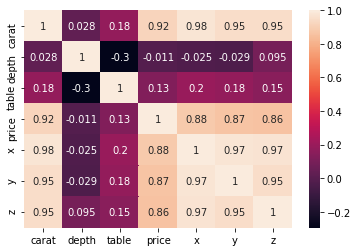

In [17]:
sns.heatmap(df.corr(), annot= True)

In [19]:
df['symmetry'] = df['x']/df['y']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,symmetry
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [20]:
df = df.dropna(axis=0)

In [22]:
df_trans = pd.get_dummies(df)
X = df_trans.drop(['price','x','y','z'], axis=1)
y = df_trans['price']
features = X.columns

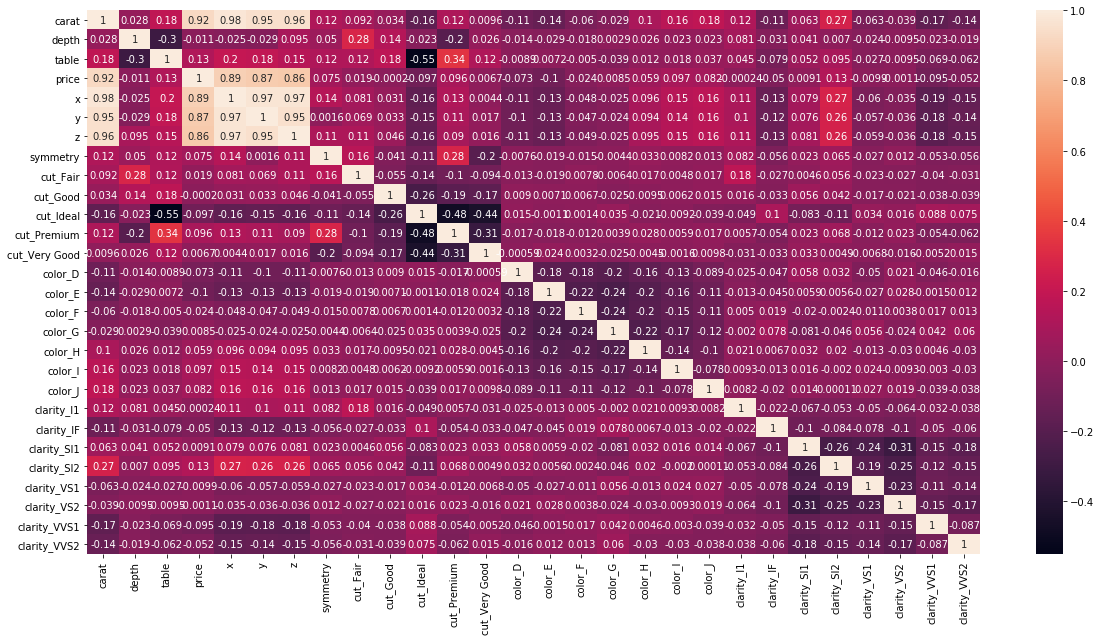

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df_trans.corr(), annot = True);

In [24]:
s = StandardScaler()
X = s.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
models_eval = pd.DataFrame(index = ['Null','KNN', 'MLR'],columns=['RMSE'])

In [27]:
ypred_null = y_train.mean()

In [30]:
#K-Neighbours Regressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [29]:
y_pred = knn.predict(X_test)

In [31]:
# Random Forrest Regression
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)
y_pred2 = y_pred = rf.predict(X_test)

In [32]:
# Linear Regression
lin = LinearRegression()
lin = lin.fit(X_train, y_train)
y_pred3 = lin.predict(X_test)

In [33]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred4 = lasso.predict(X_test)

In [34]:
model_eval = pd.DataFrame(index = ['KNN','MLR'],columns=['RMSE'])
model_eval.loc['KNN','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['RF', 'RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['MLR', 'RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['Lasso','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred4))
model_eval.loc['NULL','RMSE'] = ypred_null
model_eval

,RMSE
KNN,562.589263
MLR,1175.020857
RF,562.589263
Lasso,1174.790702
NULL,3940.603253


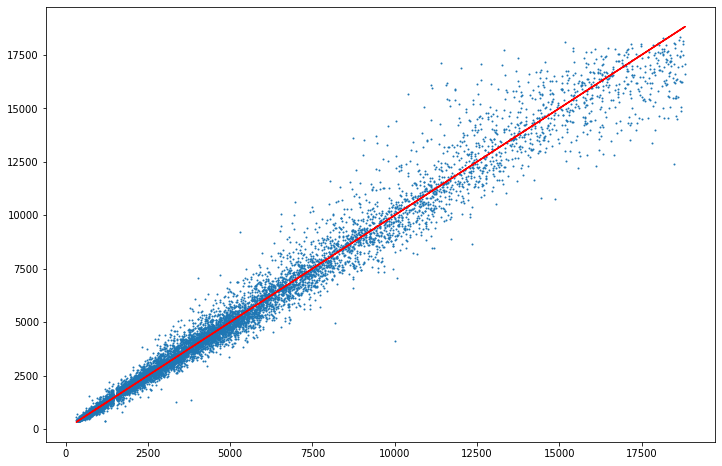

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test, y_pred,s=1)
ax.plot(y_test, y_test, color='red')